In [4]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
from matplotlib import pyplot as plt


In [5]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [6]:
# Visit the Mars NASA news site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [7]:
html = browser.html
html_soup = soup(html, 'html.parser')

In [19]:
df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')
df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [31]:
mars_df = df[0]
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [26]:
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [33]:
from datetime import datetime

mars_df["terrestrial_date"] = pd.to_datetime(mars_df["terrestrial_date"])
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [38]:
#How many months exist on Mars?
months_exist_on_Mars = mars_df["month"].nunique()
months_exist_on_Mars

12

In [43]:
#How many Martian (and not Earth) days worth of data exist in the scraped dataset
day_first = mars_df["sol"].min()
day_last  = mars_df["sol"].max()

No_of_days_data = mars_df["sol"].nunique()

print(f'The number of Martian days data exist in the scraped dataset is:', No_of_days_data )



The number of Martian days data exist in the scraped dataset is: 1867


In [64]:
# What are the coldest and the warmest months on Mars
import numpy as np
import json

average_min_temp =[]
for i in range (1, months_exist_on_Mars+1):
    monthly_weather = {"month_number" :"", "Avg_min_temp":""}
    avg_min_temp = mars_df.loc[mars_df['month'] ==i]['min_temp'].mean()
    monthly_weather["month_number"] =i
    monthly_weather["Avg_min_temp"] = round(avg_min_temp,0)
    average_min_temp.append(monthly_weather)

# monthly_temp Data frame
average_min_temp_json = json.dumps(average_min_temp)
monthly_temp_df = pd.read_json(average_min_temp_json)

monthly_temp_df



,month_number,Avg_min_temp
0,1,-77
1,2,-80
2,3,-83
3,4,-83
4,5,-79
5,6,-75
6,7,-72
7,8,-68
8,9,-69
9,10,-72


In [101]:
#Coldest Temperature 
coldest_weather_df = monthly_temp_df['Avg_min_temp'].min()
print(f'Coldest_Temperature is: ', coldest_weather_df) 

#Highest Temperature
highest_temperature_df = monthly_temp_df['Avg_min_temp'].max()


coldest_month_df = monthly_temp_df.loc[monthly_temp_df['Avg_min_temp'] == coldest_weather_df]
highest_temp_df = monthly_temp_df.loc[monthly_temp_df['Avg_min_temp'] == highest_temperature_df]

#coldest_months
coldest_month_df


print('Month 3 and 4 are cold')
coldest_month_df



Coldest_Temperature is:  -83
Month 3 and 4 are cold


,month_number,Avg_min_temp
2,3,-83
3,4,-83


In [104]:

#Highest Temperature
print(f'Highest_Temperature is:', highest_temperature_df,'and the month is 8') 

highest_temp_df

Highest_Temperature is: -68 and the month is 8


,month_number,Avg_min_temp
7,8,-68


Text(0.5, 1.0, 'coldest and the warmest months on Mars')

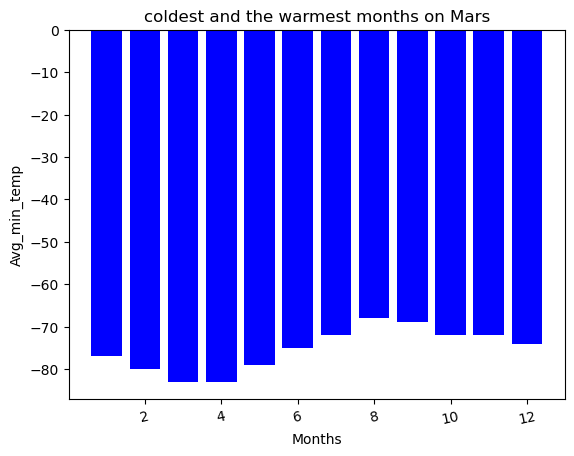

In [98]:
plt.bar(monthly_temp_df['month_number'],monthly_temp_df['Avg_min_temp'], color='blue')

# Create labels for the x and y axes.
plt.xlabel("Months")
plt.ylabel("Avg_min_temp")
plt.xticks(rotation=12, horizontalalignment="center")

# Create title 
plt.title('coldest and the warmest months on Mars')

In [107]:
# Highest and lowest atmospheric pressure

average_pressure =[]
for i in range (1, months_exist_on_Mars+1):
    monthly_pressure = {"month_number" :"", "Avg_pressure":""}
    avg_atm_pressure = mars_df.loc[mars_df['month'] ==i]['pressure'].mean()
    monthly_pressure["month_number"] =i
    monthly_pressure["Avg_pressure"] = round(avg_atm_pressure,2)
    average_pressure.append(monthly_pressure)

# monthly_temp Data frame
average_min_pressure_json = json.dumps(average_pressure)
monthly_pressure_df = pd.read_json(average_min_pressure_json)

monthly_pressure_df

,month_number,Avg_pressure
0,1,862.49
1,2,889.46
2,3,877.32
3,4,806.33
4,5,748.56
5,6,745.05
6,7,795.11
7,8,873.83
8,9,913.31
9,10,887.31


In [113]:
# Lowest atmospheric pressure
min_avg_pressure_df = monthly_pressure_df['Avg_pressure'].min()
#print(f'Coldest_Temperature is: ', coldest_weather_df) 

#Highest atmospheric pressure
highest_atmospheric_pressure_df = monthly_pressure_df['Avg_pressure'].max()


month_min_pressure_df = monthly_pressure_df.loc[monthly_pressure_df['Avg_pressure'] == min_avg_pressure_df]
highest_pressure_df = monthly_pressure_df.loc[monthly_pressure_df['Avg_pressure'] == highest_atmospheric_pressure_df]



print(f'Month 6 with the lowest pressure')
month_min_pressure_df


Month 6 with the lowest pressure


,month_number,Avg_pressure
5,6,745.05


In [127]:
# Highest atmospheric pressure

print(f'Month 9 with the highest atmospheric pressure')
highest_pressure_df

Month 9 with the highest atmospheric pressure


,month_number,Avg_pressure
8,9,913.31


Text(0.5, 1.0, 'Average pressure by month')

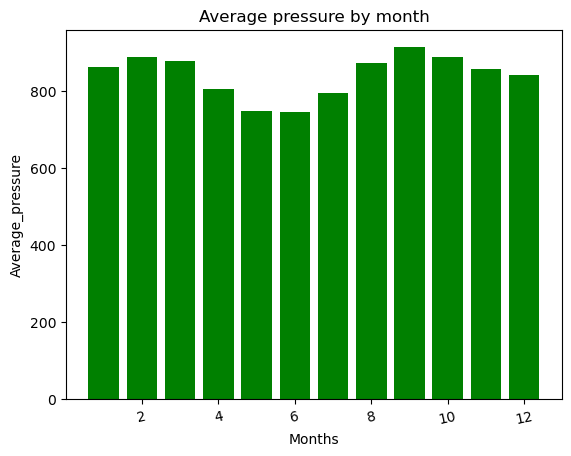

In [116]:
plt.bar(monthly_pressure_df['month_number'],monthly_pressure_df['Avg_pressure'], color='green')

# Create labels for the x and y axes.
plt.xlabel("Months")
plt.ylabel("Average_pressure")
plt.xticks(rotation=12, horizontalalignment="center")

# Create title 
plt.title('Average pressure by month')

In [122]:
#calculation of earth days in a martian year
start_month = mars_df.loc[0,'ls']
start_end = mars_df.loc[0, 'terrestrial_date']
rotation = mars_df[mars_df['ls'] ==start_month].reset_index(drop= True)
end = rotation.loc[1, 'terrestrial_date']
end - start_end

Timedelta('686 days 00:00:00')

From the below graph mars circles sun 3 times in 2000 days. (2000/3 = 666) Means 666 terrestrial days


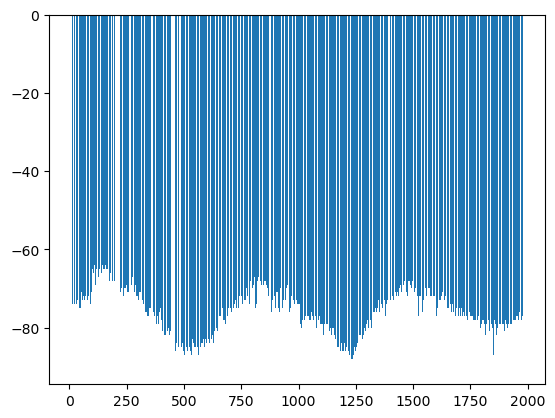

In [125]:
#plotting min temp vs martian days
plt.bar(mars_df['sol'], mars_df['min_temp'])

print("From the below graph mars circles sun 3 times in 2000 days. (2000/3 = 666) Means 666 terrestrial days")


In [126]:
# Export the DataFrame to a CSV file
mars_df.to_csv('mars_table.csv', index=False)